In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('/Users/tanishq/Desktop/Projects/Customer_Personality Analysis.csv',header=0,sep=';')

In [3]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.colors import ListedColormap

# Preprocessing: Add derived columns for analysis
data['Age'] = 2024 - data['Year_Birth']
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
data['HouseholdSize'] = data['Kidhome'] + data['Teenhome']
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
purchase_columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']



## Age Distribution of Customers
* ### The majority of customers fall between the ages of 30 to 60, with a peak around the 40-50 age range.
* ### There are a few outliers in the dataset, with some extreme ages above 100 likely requiring further data cleaning or validation.

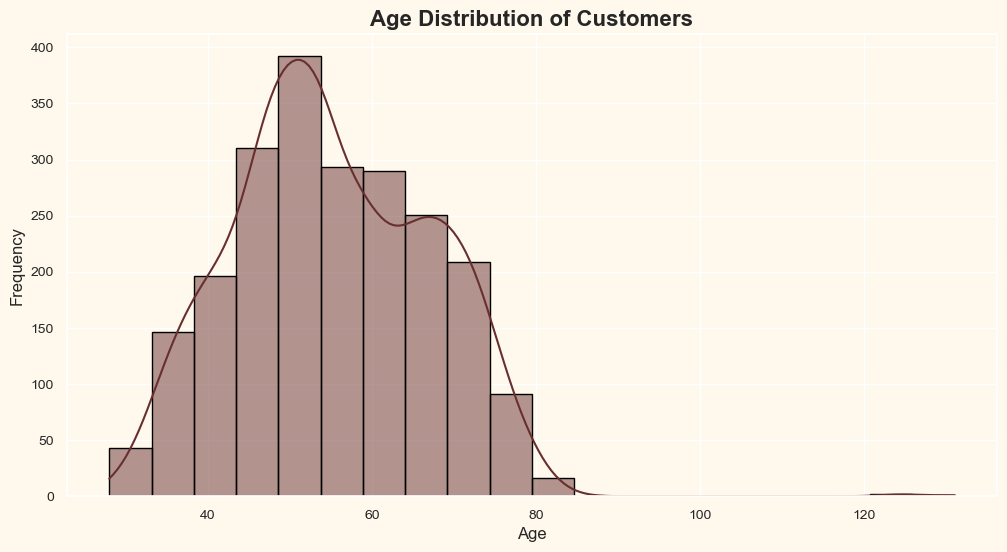

In [5]:
# Setting up color preferences
sns.set(rc={"axes.facecolor": "#FFF9ED", "figure.facecolor": "#FFF9ED"})
palette = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

# 1. Age Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data['Age'], bins=20, kde=True, color=palette[0], edgecolor="black")
plt.title('Age Distribution of Customers', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## Total Spending by Product Category
* ### Wine (MntWines) is the highest spending category, accounting for over 50% of total spending.
* ### Meat products (MntMeatProducts) are the second most popular category, with moderate spending on gold and fish products.
* ### Sweets and fruits have the lowest spending.


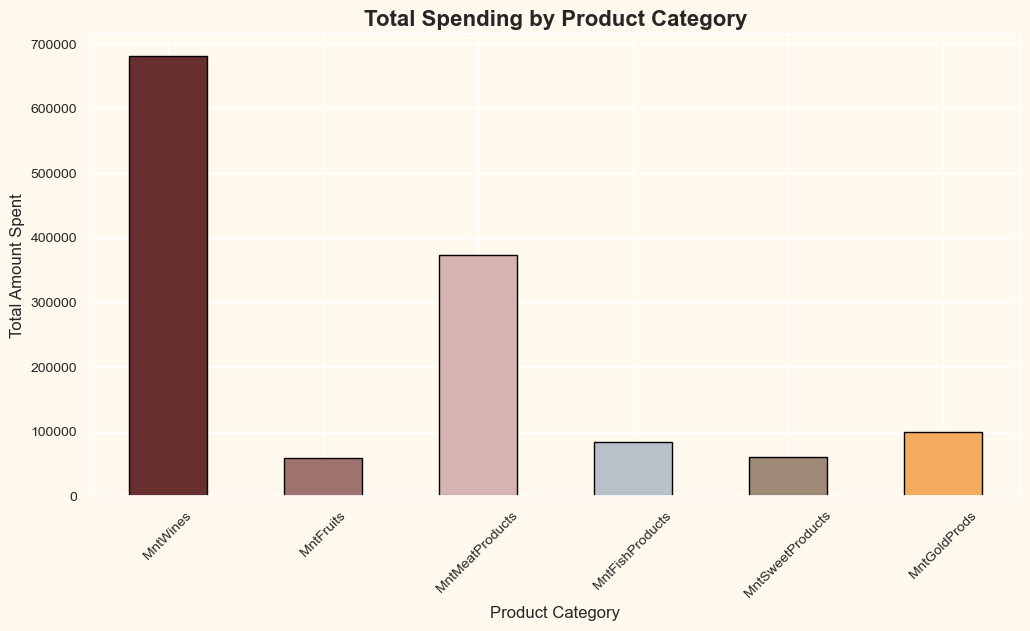

In [6]:
# 2. Total Spending by Product Category
total_spending = data[product_columns].sum()
plt.figure(figsize=(12, 6))
total_spending.plot(kind='bar', color=palette, edgecolor="black")
plt.title('Total Spending by Product Category', fontsize=16, fontweight='bold')
plt.ylabel('Total Amount Spent', fontsize=12)
plt.xlabel('Product Category', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## Campaign Acceptance Rates
* ### The highest acceptance rate is for Campaign 4, indicating improved targeting or relevance of recent campaigns.
* ### Campaign 2 had the lowest acceptance rate, suggesting it may not have resonated with the target audience.

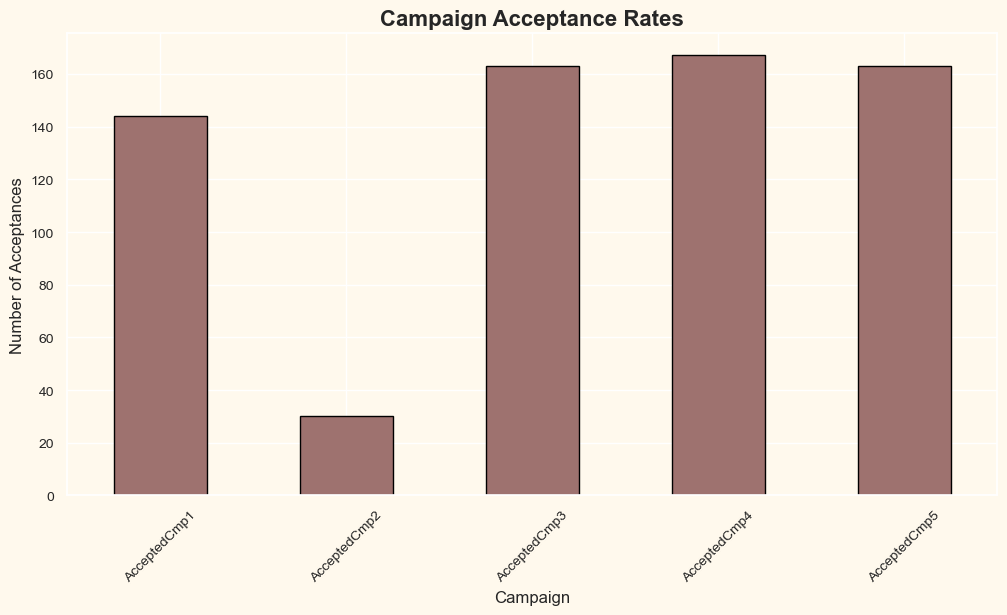

In [54]:
# 3. Campaign Acceptance Rates
campaign_acceptance = data[campaign_columns].sum()
plt.figure(figsize=(12, 6))
campaign_acceptance.plot(kind='bar', color=palette[1], edgecolor="black")
plt.title('Campaign Acceptance Rates', fontsize=16, fontweight='bold')
plt.ylabel('Number of Acceptances', fontsize=12)
plt.xlabel('Campaign', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()


## Purchases by Channel
* ### The majority of purchases occur in physical stores, highlighting the preference for in-person shopping.
* ### Website purchases are higher than catalog purchases, indicating a growing trend toward online shopping.

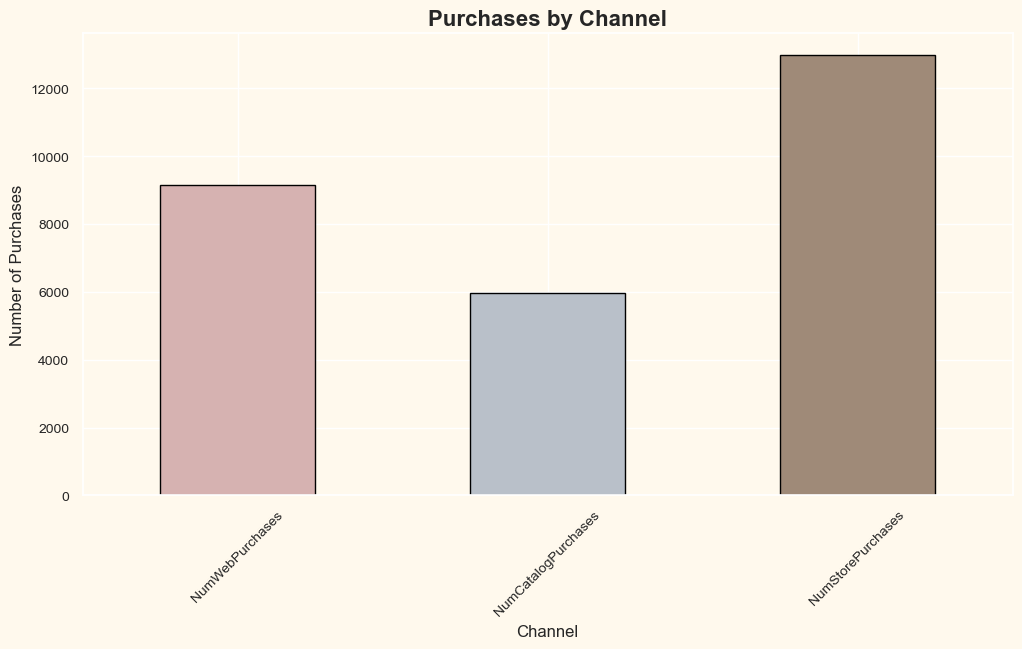

In [8]:
#4. Purchases by Channel
total_purchases = data[purchase_columns].sum()
plt.figure(figsize=(12, 6))
total_purchases.plot(kind='bar', color=palette[2:5], edgecolor="black")
plt.title('Purchases by Channel', fontsize=16, fontweight='bold')
plt.ylabel('Number of Purchases', fontsize=12)
plt.xlabel('Channel', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## Total Spending vs Complaints
* ### Customers who did not complain spent significantly more than those who did.
* ### Complaints are correlated with lower spending, potentially reflecting dissatisfaction or disengagement with the products or services.

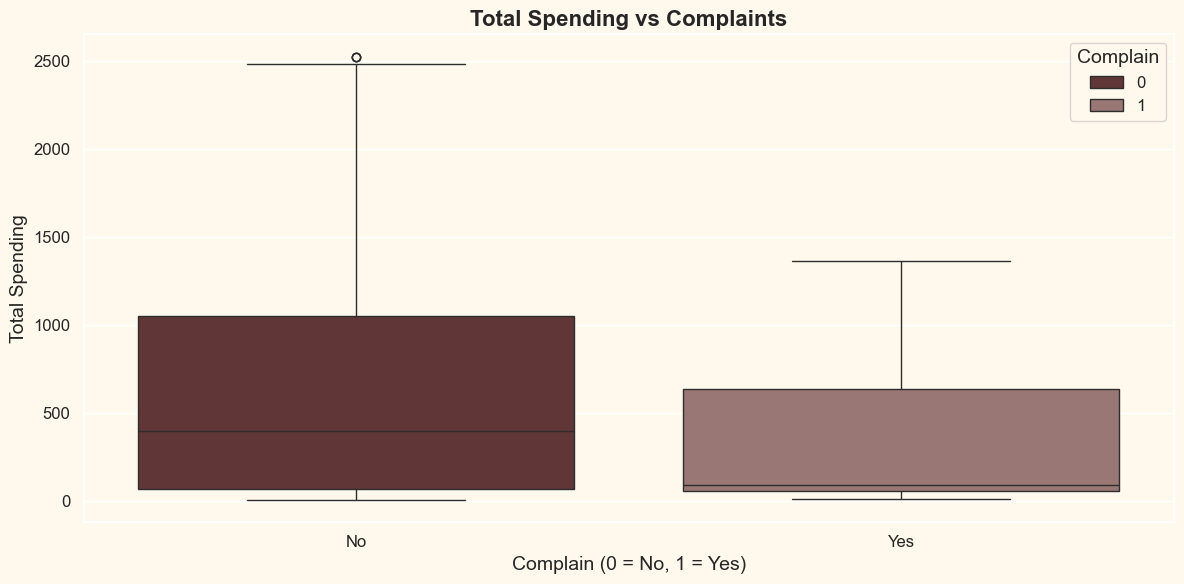

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Complain', y=data[product_columns].sum(axis=1), data=data, hue='Complain', palette=palette[:2], dodge=False)
plt.title('Total Spending vs Complaints', fontsize=16, fontweight='bold')
plt.xlabel('Complain (0 = No, 1 = Yes)', fontsize=14)
plt.ylabel('Total Spending', fontsize=14)
plt.xticks([0, 1], ['No', 'Yes'], fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Complain', fontsize=12, title_fontsize=14, loc='upper right')
plt.tight_layout()
plt.show()


## Correlation Heatmap of Spending and Demographics
* ### Income is strongly correlated with spending on wines and meat products.
* ### Age has little correlation with spending, suggesting spending patterns are more influenced by other factors like income or preferences.

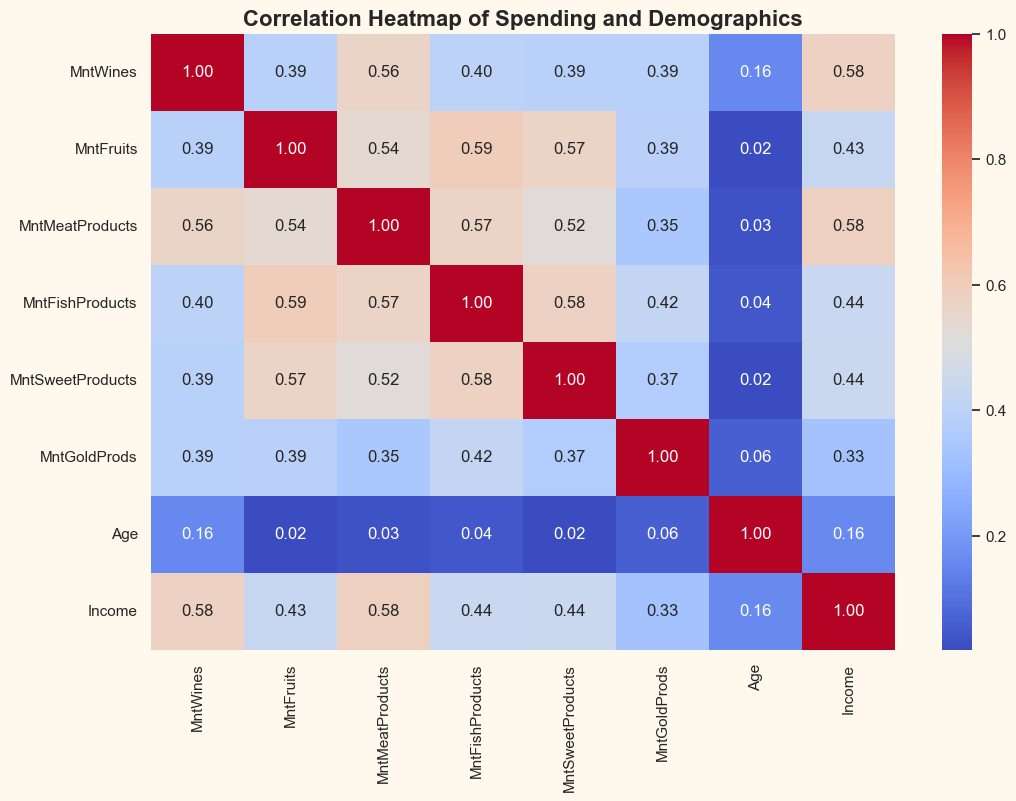

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(data[product_columns + ['Age', 'Income']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Spending and Demographics', fontsize=16, fontweight='bold')
plt.show()


## Proportion of Spending by Product Category
* ### Wine dominates the spending distribution, followed by meat products, showcasing customer preference for these categories.
* ### Other categories like gold, sweets, and fruits account for a smaller proportion of overall spending.

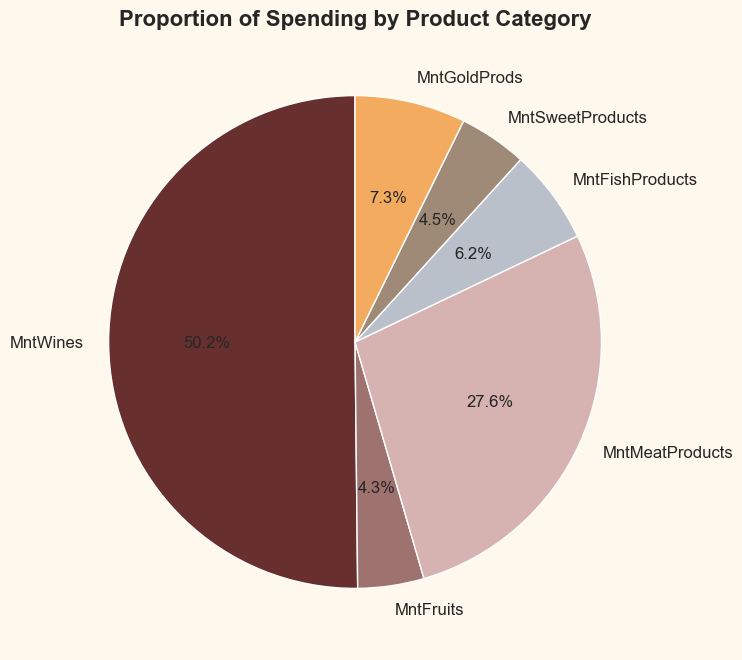

In [11]:
plt.figure(figsize=(8, 8))
total_spending.plot.pie(autopct='%1.1f%%', startangle=90, colors=palette, textprops={'fontsize': 12})
plt.title('Proportion of Spending by Product Category', fontsize=16, fontweight='bold')
plt.ylabel('')
plt.show()


##  Income Distribution by Campaign Response
* ### Customers who responded to campaigns generally have higher incomes, indicating successful targeting of affluent individuals.
* ### A few outliers with exceptionally high income skew the distribution.

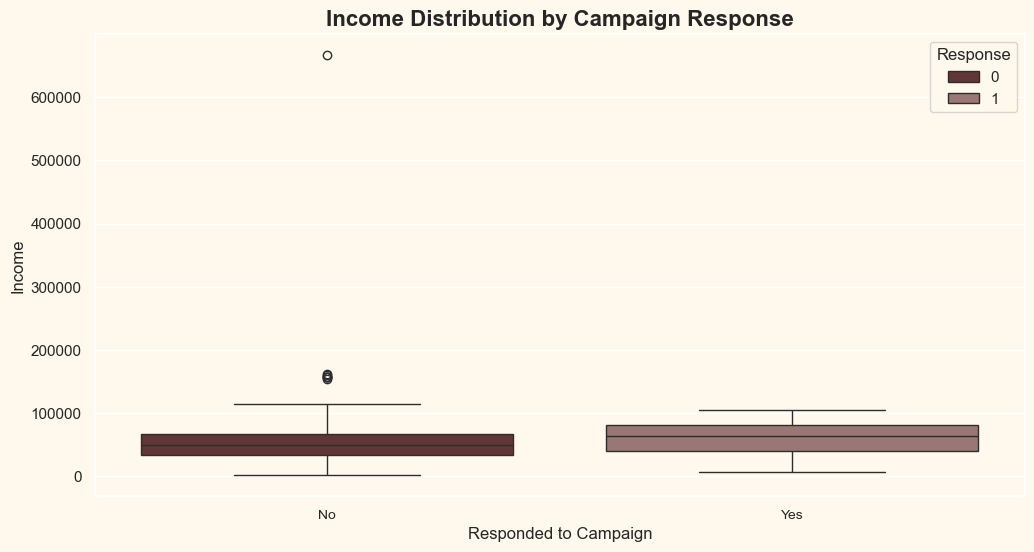

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Response', y='Income', data=data, hue = 'Response',  palette=palette[:2])
plt.title('Income Distribution by Campaign Response', fontsize=16, fontweight='bold')
plt.xlabel('Responded to Campaign', fontsize=12)
plt.ylabel('Income', fontsize=12)
plt.xticks([0, 1], ['No', 'Yes'], fontsize=10)
plt.show()


## Average Spending by Age Group

* ### Spending increases with age, peaking in the 80+ age group.
* ### Wine and meat products consistently dominate spending across all age groups.
* ### Gold and fish product spending show a gradual increase with age.

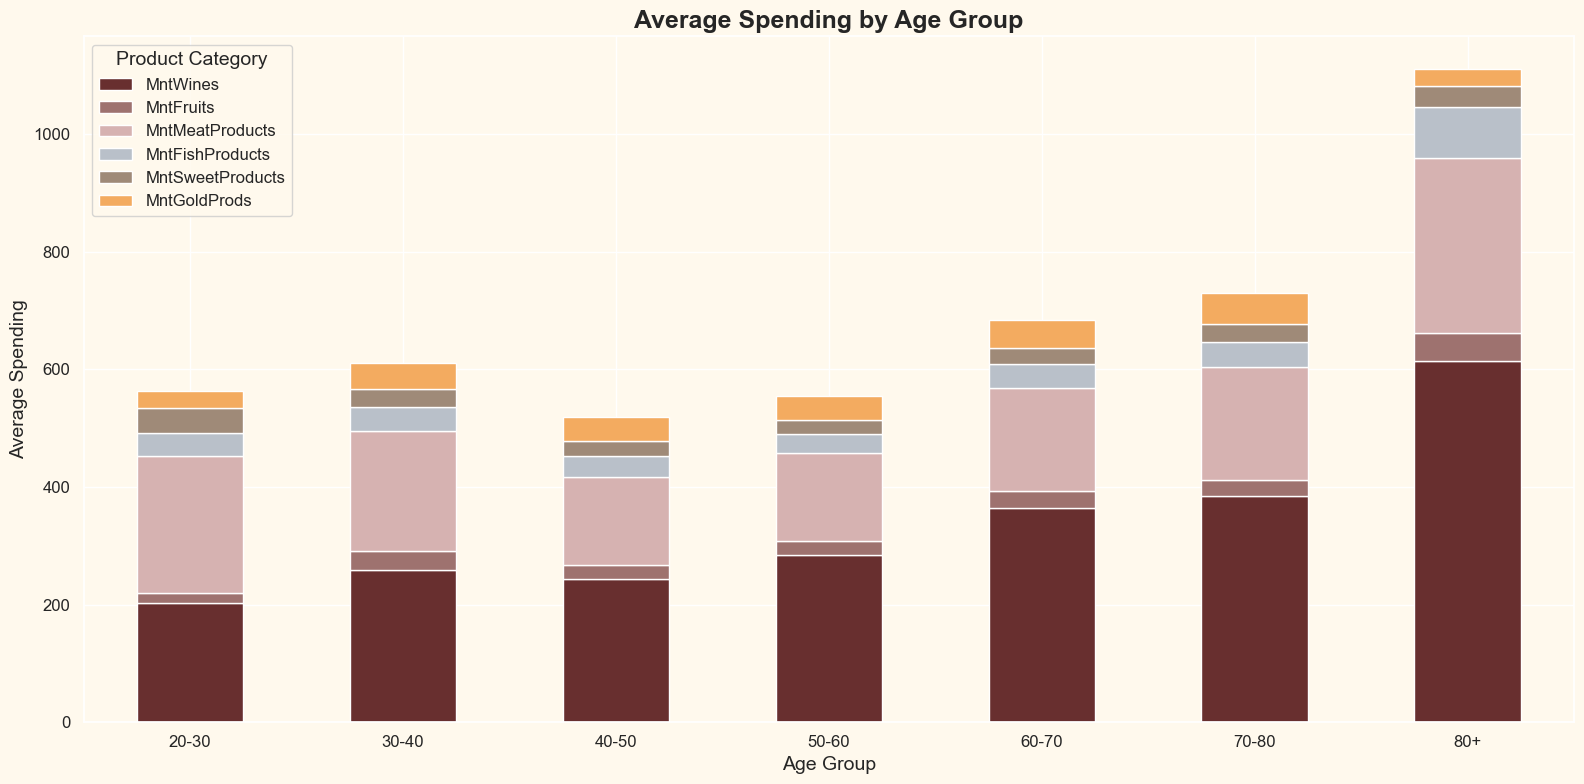

In [13]:
age_bins = [20, 30, 40, 50, 60, 70, 80, 100]
data['AgeGroup'] = pd.cut(data['Age'], bins=age_bins, labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+'], right=False)
spending_by_age = data.groupby('AgeGroup', observed=True)[product_columns].mean()

spending_by_age.plot(kind='bar', stacked=True, figsize=(16, 8), color=palette)
plt.title('Average Spending by Age Group', fontsize=18, fontweight='bold')
plt.ylabel('Average Spending', fontsize=14)
plt.xlabel('Age Group', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Product Category', fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()

## Website Visits vs Online Purchases

* ### There is a positive relationship between website visits and online purchases, but it plateaus after around 8-10 visits.
* ### Customers responding positively to campaigns tend to make more purchases online compared to those who do not respond.

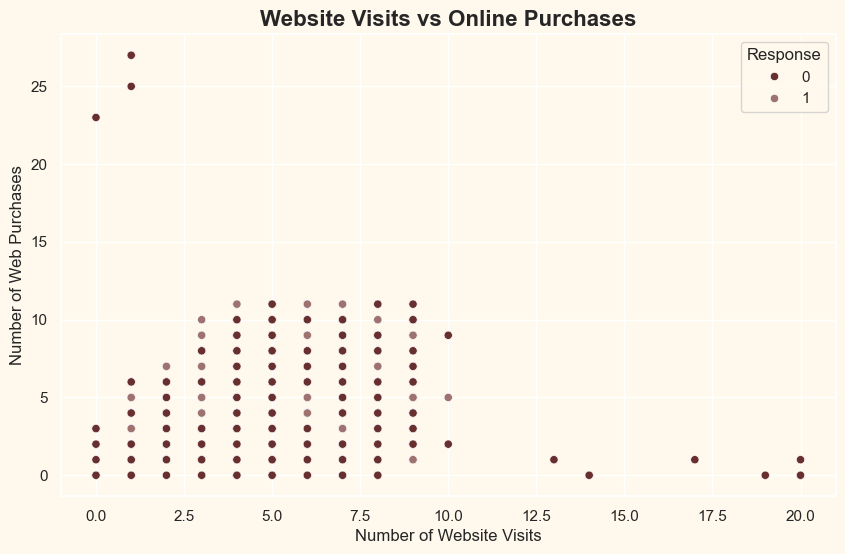

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NumWebVisitsMonth', y='NumWebPurchases', data=data, hue='Response', palette=palette[:2])
plt.title('Website Visits vs Online Purchases', fontsize=16, fontweight='bold')
plt.xlabel('Number of Website Visits', fontsize=12)
plt.ylabel('Number of Web Purchases', fontsize=12)
plt.show()


## Income vs Total Spending

* ### Total spending increases with income, but the relationship weakens at very high-income levels, possibly indicating luxury product saturation.
* ### Customers with complaints tend to have slightly lower spending, reinforcing the impact of customer satisfaction on purchases.

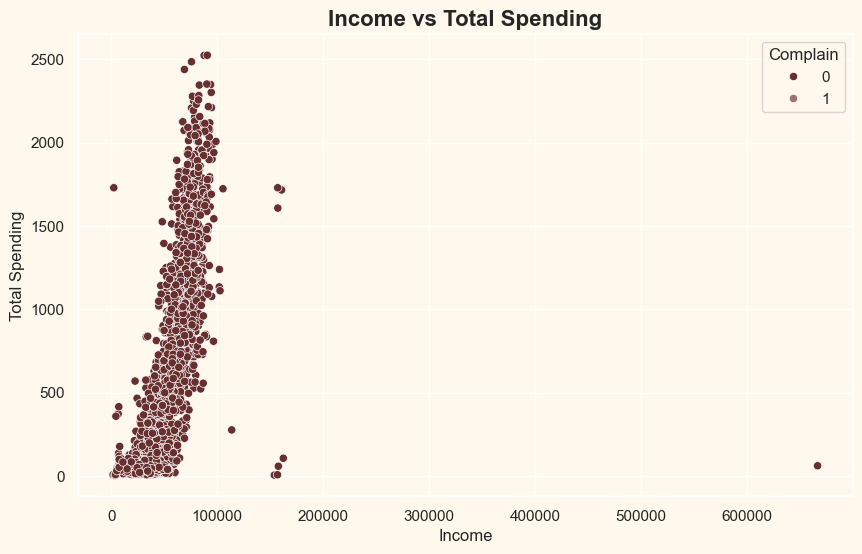

In [15]:
data['TotalSpending'] = data[product_columns].sum(axis=1)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='TotalSpending', data=data, hue='Complain', palette=palette[:2])
plt.title('Income vs Total Spending', fontsize=16, fontweight='bold')
plt.xlabel('Income', fontsize=12)
plt.ylabel('Total Spending', fontsize=12)
plt.show()


## Customer Enrollment Over Time

* ### The highest number of enrollments occurred in 2013.
* ### Enrollments declined sharply in 2014, suggesting a potential shift in marketing strategy or external factors affecting customer acquisition.

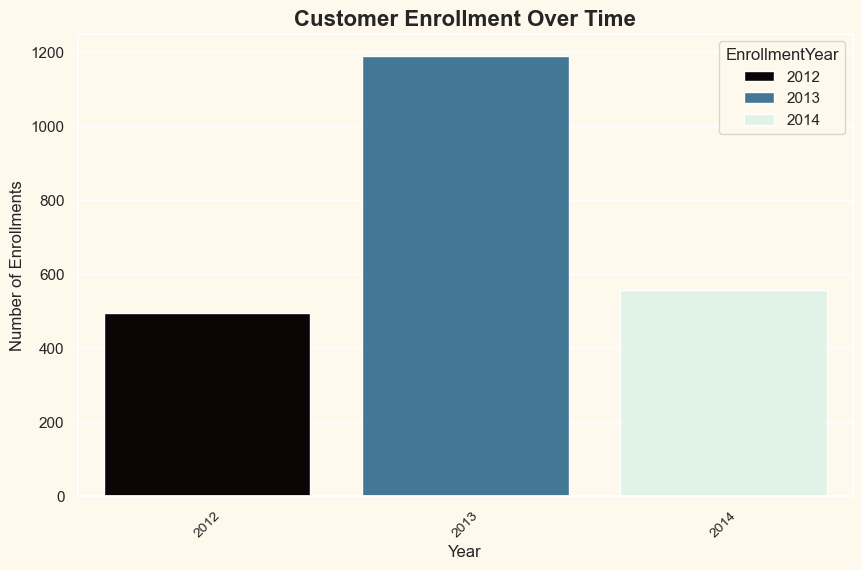

In [16]:
data['EnrollmentYear'] = pd.to_datetime(data['Dt_Customer']).dt.year
plt.figure(figsize=(10, 6))
sns.countplot(x='EnrollmentYear', data=data, hue = 'EnrollmentYear', palette='mako')
plt.title('Customer Enrollment Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Enrollments', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.show()


## Total Spending by Household Size

* ### Single-person households (HouseholdSize = 0) have the highest spending.
* ### Spending decreases as household size increases, possibly due to budget constraints in larger households.

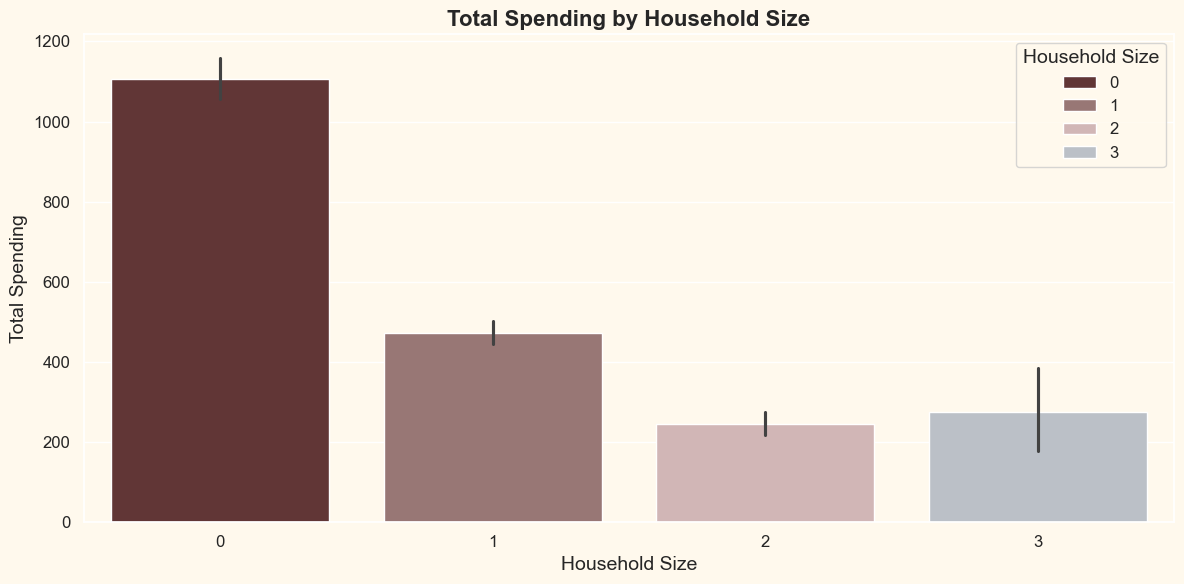

In [17]:
# Adjust palette dynamically for Household Size visualization
household_categories = data['HouseholdSize'].nunique()
plt.figure(figsize=(12, 6))
sns.barplot(x='HouseholdSize', y='TotalSpending', data=data, hue='HouseholdSize', palette=palette[:household_categories], dodge=False)
plt.title('Total Spending by Household Size', fontsize=16, fontweight='bold')
plt.xlabel('Household Size', fontsize=14)
plt.ylabel('Total Spending', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Household Size', fontsize=12, title_fontsize=14, loc='upper right')
plt.tight_layout()
plt.show()

## Spending Behavior by Education Level

* ### Customers with higher education levels (Master’s and Ph.D.) tend to spend more, particularly on wines and gold products.
* ### Spending on basic categories (like fruits and sweets) remains consistent across education levels.

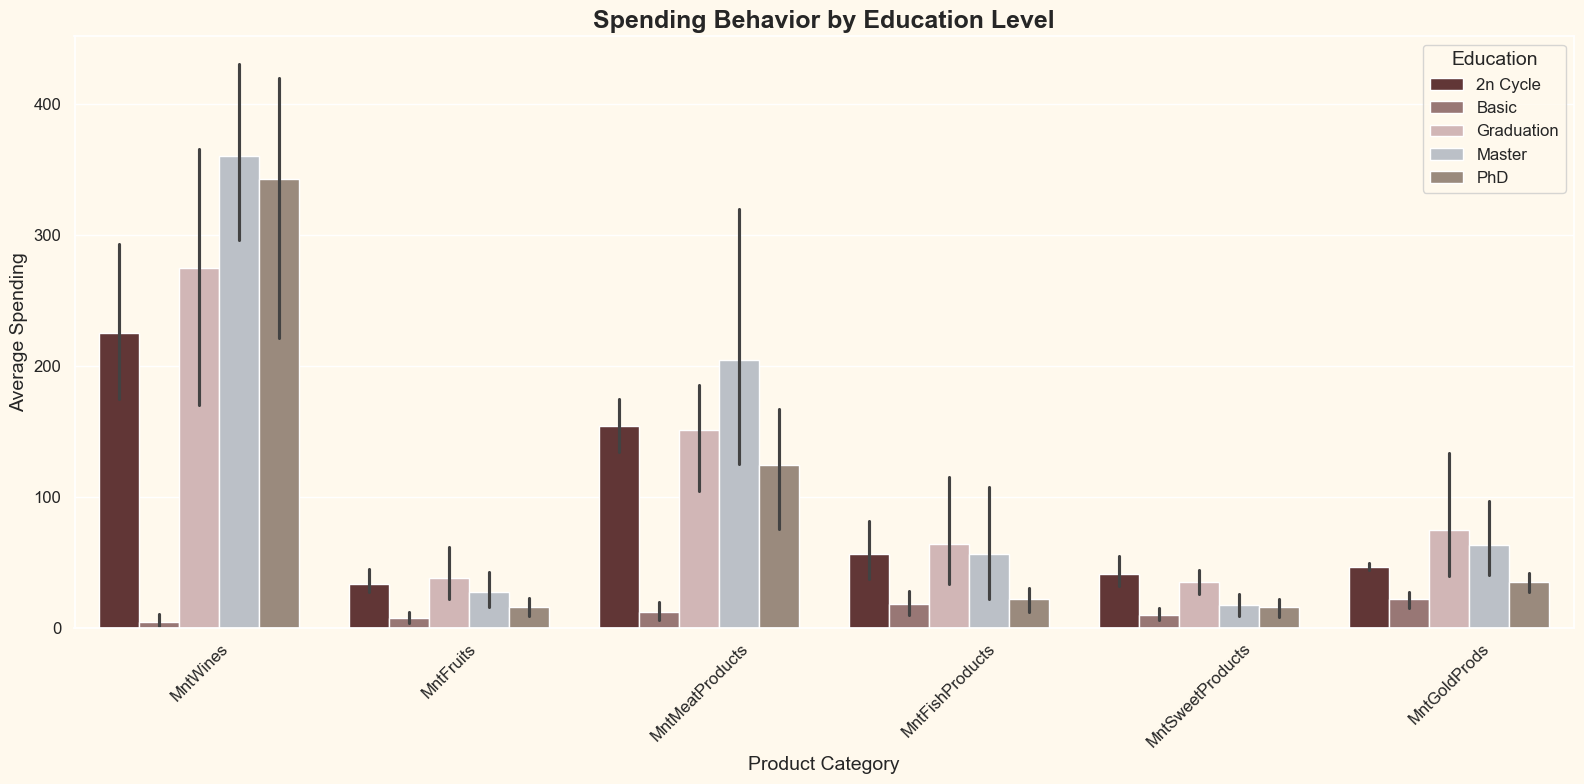

In [19]:
# Spending Behavior by Graduation 
spending_data = data.groupby(['Education', 'Marital_Status'])[product_columns].mean().reset_index()
spending_data_melted = spending_data.melt(id_vars=['Education', 'Marital_Status'], 
                                          var_name='Product', value_name='Average Spending')

# Dynamically adjusting the palette size
education_categories = spending_data['Education'].nunique()
marita_status_categories = spending_data['Marital_Status'].nunique()

plt.figure(figsize=(16, 8))
sns.barplot(data=spending_data_melted, x='Product', y='Average Spending', hue='Education', palette=palette[:education_categories])
plt.title('Spending Behavior by Education Level', fontsize=18, fontweight='bold')
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Average Spending', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Education', fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()


## Spending Behavior by Marital Status

* ### Married and divorced individuals have higher spending across most product categories.
* ### Absurd and YOLO marital statuses are outliers with extreme variations in spending, requiring deeper data verification.

/var/folders/xz/q94zrrts0633czyfk72bc8tr0000gn/T/ipykernel_45111/383630823.py:2: UserWarning: 
The palette list has fewer values (6) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=spending_data_melted, x='Product', y='Average Spending', hue='Marital_Status', palette=palette)


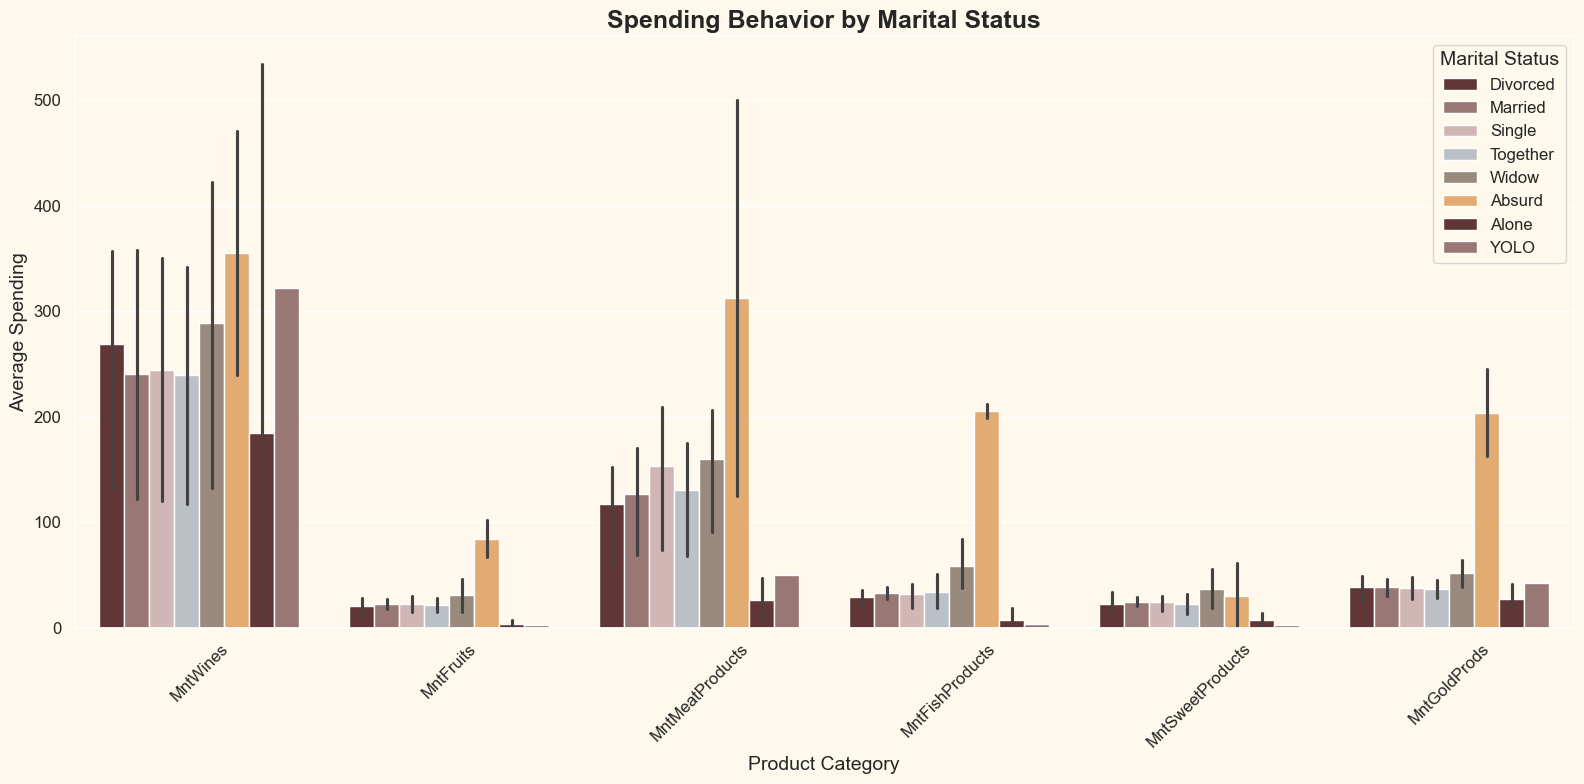

In [42]:
plt.figure(figsize=(16, 8))
sns.barplot(data=spending_data_melted, x='Product', y='Average Spending', hue='Marital_Status', palette=palette)
plt.title('Spending Behavior by Marital Status', fontsize=18, fontweight='bold')
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Average Spending', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Marital Status', fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()
